In [446]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [447]:
def plot_decision_boundaries(X, Y, clf, h=.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
                
    return ax

def plot_scatter (X,Y,C, title="", xlabel="", ylabel=""):
    fig = plt.scatter(X,Y,c=C)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(handles=fig.legend_elements()[0], labels=set(C))
    
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

In [448]:
#loading the data and selecting the feature:
data = load_wine()
data_df = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])

# select any two featurea:
att_ind = [0,1]                              #specify the index of the features to be selected
att = np.array(data.feature_names)[att_ind]  #selected features names
x = np.array(data.data)[:,att_ind]
y = np.array(data.target)

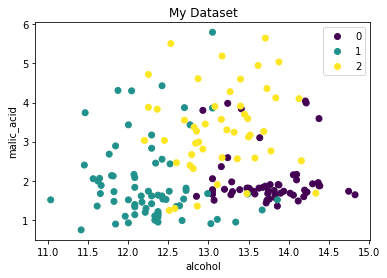

In [449]:
 figure1 = plot_scatter(x[:,0], x[:,1], y, title="My Dataset", xlabel=att[0], ylabel=att[1])

In [450]:
# spletting the data into train, validation, and test:
x_train, x_rest, y_train, y_rest = train_test_split(x, y, test_size=0.5, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_rest, y_rest, test_size=0.6, random_state=42)

#x_rest, x_test, y_rest, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, random_state = 42)
#x_train, x_val, y_train, y_val = train_test_split(x_rest, y_rest, train_size = 5/7, shuffle = True, random_state = 42)

#x_rest, x_test, y_rest, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
#x_train, x_val, y_train, y_val = train_test_split(x_rest, y_rest, train_size = 5/7, random_state = 42)

# KNN algorithem for different value of K:


In [451]:
import warnings
warnings.filterwarnings('ignore')

k_values = [1,3,5,7]
acc_knn = []

for i in k_values :
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    clf_knn.fit(x_train, y_train)
    #plot_decision_boundaries(x_train, y_train, clf_knn)  
    #plot_scatter(x[:,0], x[:,1], y, title="K=%i,"%(i), xlabel=att[0], ylabel=att[1])
    
    y_val_pred = clf_knn.predict(x_val)
    acc = accuracy_score(y_val, y_val_pred)
    acc_knn.append(acc)

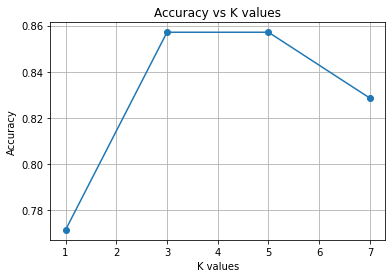

In [452]:
plt.plot(k_values, acc_knn, marker = 'o')
plt.title('Accuracy vs K values')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.grid()

In [453]:
Best_K = k_values[np.argmax(acc_knn)] #select the best value of K

clf_knn = KNeighborsClassifier(n_neighbors=Best_K)
clf_knn.fit(x_train, y_train)

y_test_pred = clf_knn.predict(x_test)
acc_test_knn = accuracy_score(y_test, y_test_pred)

# linear SVM for different value of C:


In [454]:
import warnings
warnings.filterwarnings('ignore')

c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc_svm = []

for i in c_values :
    clf_svm = svm.SVC(kernel='linear', C=i)
    clf_svm.fit(x_train, y_train)
    #plot_decision_boundaries(x_train, y_train, clf_svm)
    #plot_scatter(x[:,0], x[:,1], y, title="C=%i,"%(i), xlabel=att[0], ylabel=att[1])
    
    y_val_pred = clf_svm.predict(x_val)
    acc = accuracy_score(y_val, y_val_pred)
    acc_svm.append(acc)

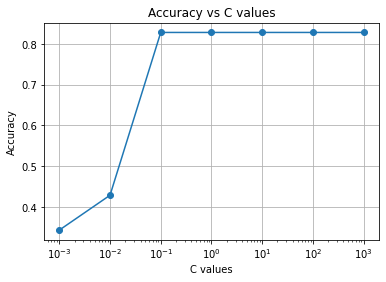

In [455]:
x_range = np.logspace(-3,3,7)
plt.semilogx(x_range, acc_svm, marker = 'o')
plt.title('Accuracy vs C values')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.grid()

In [456]:
Best_c = c_values[np.argmax(acc_svm)] #select the best value of C

clf_svm = svm.SVC(kernel='linear', C=Best_c)
clf_svm.fit(x_train, y_train)

y_test_pred = clf_svm.predict(x_test)
acc_svm_test = accuracy_score(y_test, y_test_pred)

# SVM with RBF kernal for default gamma and different value of C:

In [457]:
import warnings
warnings.filterwarnings('ignore')

c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc_rbf = []

for i in c_values :
    clf_rbf = svm.SVC(kernel='rbf', C=i)
    clf_rbf.fit(x_train, y_train)
    #plot_decision_boundaries(x_train, y_train, clf_rbf)
    #plot_scatter(x[:,0], x[:,1], y, title="C=%i,"%(i), xlabel=att[0], ylabel=att[1])
    
    y_val_pred = clf_rbf.predict(x_val)
    acc = accuracy_score(y_val, y_val_pred)
    acc_rbf.append(acc)

In [458]:
Best_c = c_values[np.argmax(acc_rbf)] #select the best value of K

clf_rbf = svm.SVC(kernel='rbf', C=Best_c)
clf_rbf.fit(x_train, y_train)

y_test_pred = clf_rbf.predict(x_test)
acc_test_rbf = accuracy_score(y_test, y_test_pred)


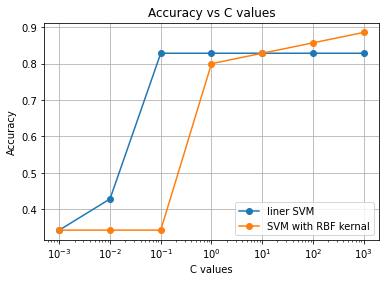

In [459]:
x_range = np.logspace(-3,3,7)
plt.semilogx(x_range, acc_svm, marker = 'o', label="liner SVM")
plt.semilogx(x_range, acc_rbf, marker = 'o', label="SVM with RBF kernal")
plt.title('Accuracy vs C values')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# SVM with RBF kernal for different value of C and gamma:

In [460]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

acc_rbf_c_gamma=[]
for i in c_values:
    for j in gamma_values:
        clf_rbf_gamma = svm.SVC(kernel='rbf', gamma= j, C=i)
        clf_rbf_gamma.fit(x_train, y_train)
        
        #plot_decision_boundaries(x_train, y_train, clf_rbf_gamma)
        #plot_scatter(x[:,0], x[:,1], y, title="C=%f & gamma=%f," %(i,j), xlabel=att[0], ylabel=att[1])
        
        y_val_predict = clf_rbf_gamma.predict(x_val)
    
        acc = accuracy_score(y_val, y_val_predict)
        acc_rbf_c_gamma.append([i,j,acc])
acc_rbf_c_gamma_df  = pd.DataFrame(acc_rbf_c_gamma, columns=['C', 'Gamma', 'Accuracy_score'])


<AxesSubplot:xlabel='C', ylabel='Gamma'>

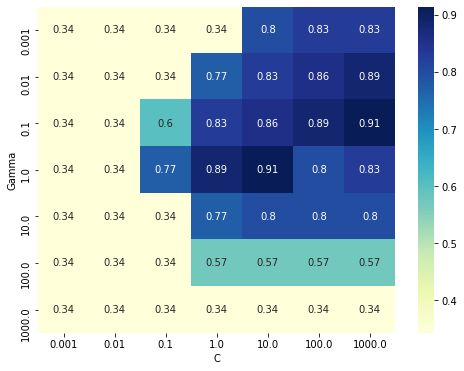

In [461]:
plt.figure(figsize=(8,6))
c_gamma_heatmap = pd.pivot_table(acc_rbf_c_gamma_df, values='Accuracy_score', index=['Gamma'], columns='C')
sns.heatmap(c_gamma_heatmap, cmap="YlGnBu", annot=True)

# Finding best C & best gamma using GridSearchCV

In [476]:
x_train2 = np.concatenate((x_train, x_val))
y_train2 = np.concatenate((y_train, y_val))

In [477]:
tuned_parameters = [{'gamma': [1e-3, 1e-2,1e-1,1, 1e1,1e2, 1e3],
                     'C': [.001, .01, .1, 1, 10, 100, 1000]}]

clf_svm_gridSearch = GridSearchCV(svm.SVC(), tuned_parameters, cv=5, n_jobs=-1, verbose=2)
clf_svm_gridSearch.fit(x_train2, y_train2)
print("Best parameters set found on development set:")
print(clf_svm_gridSearch.best_params_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters set found on development set:
{'C': 10, 'gamma': 1}


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    4.5s finished


In [482]:
Best_c = clf_svm_gridSearch.best_params_['C']
Best_gamma = clf_svm_gridSearch.best_params_['gamma']

clf_svm_Best = svm.SVC(kernel='rbf', gamma= Best_gamma, C=Best_c)
clf_svm_Best.fit(x_train2, y_train2)

y_test_p = clf_svm_Best.predict(x_test)
acc_test_Best = accuracy_score(y_test, y_test_p)